# Support Vector Machine

#### ÏÑ†Ìòï, ÎπÑÏÑ†Ìòï Î∂ÑÎ•ò(linear, non-linear classification), ÌöåÍ∑Ä(regression), Ïù¥ÏÉÅÏπò(Outlier) ÌÉêÏÉâ Îì± Î≥µÏû°Ìïú Î∂ÑÎ•òÎ¨∏Ï†úÏóê Ï†ÅÏ†àÌïú Îã§Î™©Ï†Å Í∏∞Í≥ÑÌïôÏäµ Î™®Îç∏ 


## ÏûëÎèôÏõêÎ¶¨ 

#### Î∂ÑÎ•òÎ•º ÏúÑÌïú ÏµúÏ†ÅÏùò Í≤∞Ï†ïÍ≤ΩÍ≥Ñ(decision boundary) Ï¶â, Îã§ÏàòÏùò Í≤∞Ï†ïÍ≤ΩÍ≥Ñ ÌõÑÎ≥¥Îì§ Ï§ëÏóêÏÑú ÏµúÎåÄÏùò ÎßàÏßÑÏùÑ Í∞ñÎäî Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎ•º Ï∞æÏùå

---

## SVM ÌÅ¥ÎûòÏä§(numpyÎ°ú ÏßÅÏ†ë Íµ¨ÌòÑÌïú Í≤É)

In [1]:
import numpy as np

class SVM:
    def __init__(self, X, y, epochs, lr, C):
        self.X = X; self.y = y; self.epochs = epochs
        self.lr = lr; self.C = C

        # Add column vector of ones for computational convenience
        self.X = np.column_stack((np.ones(len(X)), X))

        # Initialize normal vector
        self.w = np.ones(len(self.X[0]))

    def distances(self, w, with_lagrange=True):
        distances = self.y * (np.dot(self.X, w)) - 1

        # get distance from the current decision boundary
        # by considering 1 width of margin

        if with_lagrange: # if lagrange multiplier considered
            # if distance is more than 0, sample is not on the support vector
            # Lagrange multiplier will be 0
            distances[distances > 0] = 0
        return distances

    def get_cost_grads(self, X, w, y):
        distances = self.distances(w)
        
        # Get current cost
        L = 1 / 2 * np.dot(w, w) - self.C * np.sum(distances)
        dw = np.zeros(len(w))

        for ind, d in enumerate(distances):
            if d == 0: # if sample is not on the support vector
                di = w # (alpha * y[ind] * X[ind]) = 0
            else:
                # (alpha * y[ind] * X[ind]) = y[ind] * X[ind]
                di = w - (self.C * y[ind] * X[ind])
            dw += di
        return L, dw / len(X)
    
    def fit(self):
        for i in range(self.epochs):
            L, dw = self.get_cost_grads(self.X, self.w, self.y)
            self.w = self.w - self.lr * dw

    def predict(self, X):
        X = np.column_stack((np.ones(len(X)), X))
        return np.sign(X @ self.w) # X @ self.w => X.dot(self.w)

---

## Soft margin Classification

#### Ïù¥ÏÉÅÏπò(outlier)Í∞Ä ÏûàÎäî Í≤ΩÏö∞Ïóê ÎØºÍ∞êÌïú ÌïòÎìú ÎßàÏßÑ Î∂ÑÎ•òÏùò Î¨∏Ï†úÏ†êÏùÑ ÌîºÌïòÍ∏∞ ÏúÑÌïú Í≤É

### sklearn.svm.SVC
#### SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale‚Äô, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr‚Äô, break_ties=False, random_state=None)

### Ï£ºÏöî ÌååÎùºÎ©îÌÑ∞ 
#### - kernel: Ïª§ÎÑê Ïú†Ìòï ÏßÄÏ†ï  {‚Äòlinear‚Äô, ‚Äòpoly‚Äô, ‚Äòrbf‚Äô, ‚Äòsigmoid‚Äô, ‚Äòprecomputed‚Äô}
#### - C: Ïò§Î•òÌóàÏö© Ï†ïÎèÑÏùò Ïó≠Ïàò {ÏûëÏùÑÏàòÎ°ù Ïò§Î•òÎ•º ÎßéÏù¥ ÌóàÏö©(Ïù¥ÏÉÅÏπòÏóê Îçú ÎØºÍ∞êÌï®)}
#### - gamma: Kernel Í≥ÑÏàò {for ‚Äòrbf‚Äô, ‚Äòpoly‚Äô, ‚Äòsigmoid‚Äô}

accuracy: 1.0


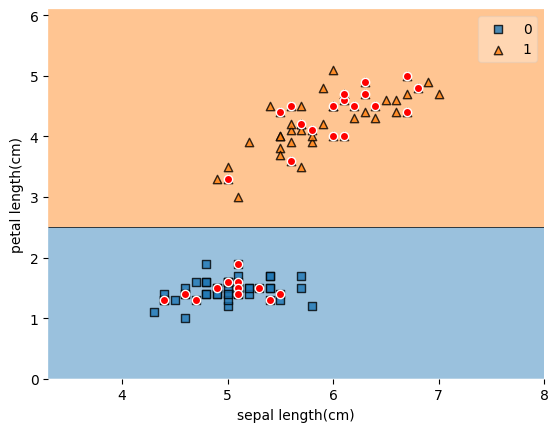

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris["data"][0:100, (0,2)] # Ï≤òÏùå 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞ Ï§ëÏóêÏÑú ÍΩÉÎ∞õÏπ® Í∏∏Ïù¥, ÍΩÉÏûé Í∏∏Ïù¥
y = iris["target"][0:100] # Ï≤òÏùå 50Í∞úÎäî Iris-setosa, Îã§Ïùå 50Í∞úÎäî Iris-versicolor
y = np.where(y==0, 0, 1) # ÎßåÏùº Iris-setosaÏù¥Î©¥ 0, ÏïÑÎãàÎ©¥ 1Î°ú Î≥ÄÍ≤Ω

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = SVC(kernel='linear', C=0.5)   # kernel Ïú†Ìòï linear(ÏÑ†Ìòï Î∂ÑÎ•ò) ÏßÄÏ†ï, rbfÍ∞Ä default
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")

plot_decision_regions(X, y, clf=clf)
plt.scatter(X_test[:,0], X_test[:,1], marker="o", color="r", edgecolor="w")
plt.xlabel('sepal length(cm)')
plt.ylabel('petal length(cm)')
plt.show()

---

## ÎπÑÏÑ†Ìòï SVM

### Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ 

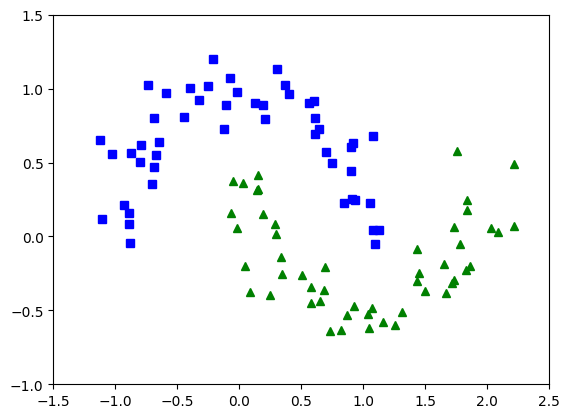

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15)

plt.plot(X[:,0][y==0], X[:,1][y==0], "bs")
plt.plot(X[:,0][y==1], X[:,1][y==1], "g^")
plt.axis([-1.5, 2.5, -1.0, 1.5])
plt.show()

### StandardScalerÎ°ú Î∂ÑÎ•ò 

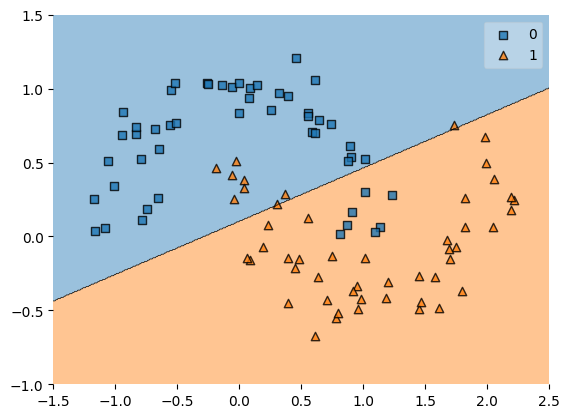

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline  
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15)  # make_moons Îã¨ Î™®ÏñëÏúºÎ°ú ÎπÑÏÑ†Ìòï Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
svm_clf = make_pipeline(                      # ÏùºÎ†®Ïùò ÎèôÏûëÏùÑ Î∞∞ÏπòÏ≤òÎ¶¨ÌïòÎäî pipeline
    StandardScaler(),
    SVC(kernel='linear', C=10))

svm_clf.fit(X, y)

plot_decision_regions(X, y, clf=svm_clf)
plt.axis([-1.5, 2.5, -1.0, 1.5])
plt.show()

---

## PolynomialFeatures

#### Í∞Å ÌäπÏÑ±ÏùÑ Ï£ºÏñ¥ÏßÑ degreeÏóê Îî∞Îùº Ï†úÍ≥±ÌïòÏó¨ ÏÉàÎ°úÏö¥ ÌäπÏÑ±ÏúºÎ°ú Ï∂îÍ∞Ä

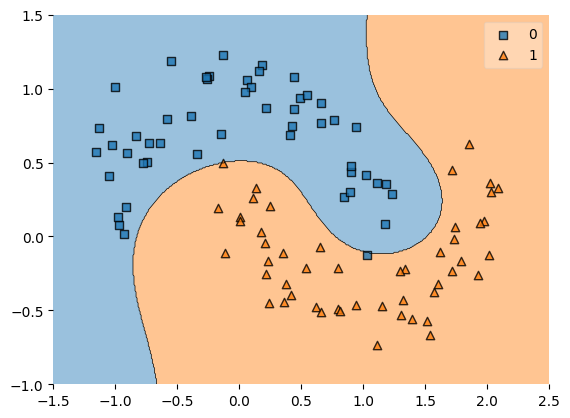

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15)
svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),   # degreeÏóê Îî∞Îùº Ï†úÍ≥±ÌïòÏó¨ ÏÉàÎ°úÏö¥ ÌäπÏÑ± Ï∂îÍ∞Ä 
    StandardScaler(),
    SVC(kernel='linear', C=10))  # ÏÑ†Ìòï Î∂ÑÎ•ò 

svm_clf.fit(X, y)

plot_decision_regions(X, y, clf=svm_clf)
plt.axis([-1.5, 2.5, -1.0, 1.5])
plt.show()

---

## Îã§Ìï≠Ïãù Ïª§ÎÑê(kernel=‚Äòpoly‚Äô)

#### Ïª§ÎÑê Ìä∏Î¶≠ÏùÑ ÏÇ¨Ïö©Ìï¥ ÎÜíÏùÄ Ï∞®ÏàòÏùò ÌäπÏÑ±ÏùÑ Ï∂îÍ∞ÄÌïú Í≤ÉÍ≥º Í∞ôÏùÄ Ìö®Í≥ºÎ•º Í∞ÄÏßÄÎ©¥ÏÑúÎèÑ Ïã§Ï†úÎ°ú ÌäπÏÑ±ÏùÑ Ï∂îÍ∞ÄÌïòÏßÄ ÏïäÏùåÏúºÎ°ú Î™®Îç∏Ïù¥ ÎäêÎ†§ÏßÄÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌï† Ïàò ÏûàÎã§. 


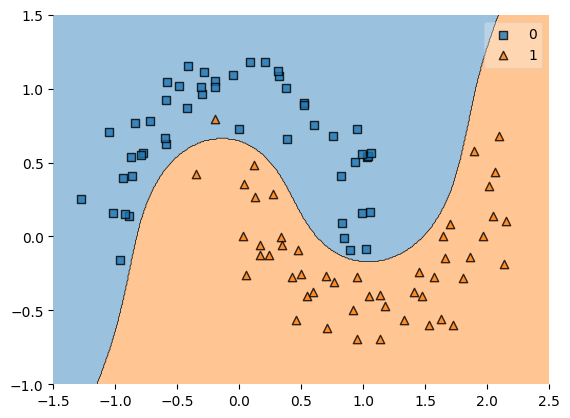

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15)
svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=3, coef0=1, C=5))  # Ïò§Ï∞®Î•º Ï§ÑÏùºÏàú ÏûàÏúºÎÇò Î™®Îç∏Ïù¥ Îß§Ïö∞ ÎäêÎ†§Ïßê 
svm_clf.fit(X, y)

plot_decision_regions(X, y, clf=svm_clf)
plt.axis([-1.5, 2.5, -1.0, 1.5])
plt.show()

---

## Í∞ÄÏö∞ÏãúÏïà RBF Ïª§ÎÑê(kernel=‚Äòrbf‚Äô)

#### Í∏∞Ï°¥ Î≤°ÌÑ∞ ùúáÏôÄ ÏûÖÎ†•Î≤°ÌÑ∞ ùë•Ïùò Ïú†ÏÇ¨ÎèÑ(similarity)Î•º Ï∏°Ï†ïÌïòÎäî Ìï®Ïàò
#### Í∞Å ÏÉòÌîåÏù¥ ÌäπÏ†ï randmarkÏôÄ ÏñºÎßàÎÇò Ïú†ÏÇ¨ÌïúÏßÄ Í≥ÑÏÇ∞Ìïú Í∞íÏùÑ Ï∂îÍ∞ÄÌïúÎã§. 

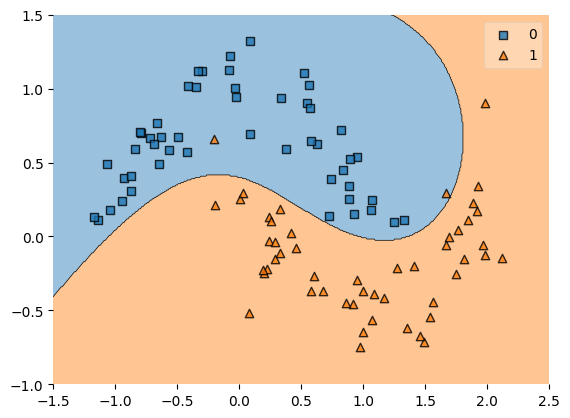

In [7]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15)
svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', gamma=0.1, C=100))
svm_clf.fit(X, y)

plot_decision_regions(X, y, clf=svm_clf)
plt.axis([-1.5, 2.5, -1.0, 1.5])
plt.show()